# Gọi thư viện

In [1]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.model_selection import train_test_split 
from keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
import tensorflow as tf
import cv2

In [2]:
# đọc tên các lớp :  có 9 loại
# DIR = 'D:\study-hk2\ML\ML\classification_fish\data\Fish_Dataset' 
DIR = "D:\\study\\machine_learning\\classification_fish\\data\\Fish_Dataset"
classes = [i for i in os.listdir(DIR) if '.' not in i]                     
classes

['Black Sea Sprat',
 'Gilt Head Bream',
 'Hourse Mackerel',
 'Red Mullet',
 'Red Sea Bream',
 'Sea Bass',
 'Shrimp',
 'Striped Red Mullet',
 'Trout']

In [3]:
# tạo mảng chứa các lớp và đường dẫn đến các file ảnh RGB và ko đọc các file ảnh GT
label = []
path = []

for dirname, _,filenames in os.walk(DIR):                    
    for filename in filenames:                                 
        if os.path.splitext(filename)[-1]=='.png':               # If filename contains .png
            if dirname.split()[-1]!='GT':                       # If directory doesn't contain GT
                label.append(os.path.split(dirname)[-1])         # Append the directory name to label 
                path.append(os.path.join(dirname,filename))     # Append all the png files to path of that directory

# Ready to create the df
df = pd.DataFrame(columns=['path','label'])
df['path']=path # đường dẫn đến ảnh các loại cá
df['label']=label 

In [4]:
# Xem kích thước của mỗi ảnh
PATH_1 = df['path'][0]
img = cv2.imread(PATH_1)
height, width, channels = img.shape
print('Chiều cao:', height)
print('Chiều rộng:', width)
print('Số kênh màu:', channels)

Chiều cao: 445
Chiều rộng: 590
Số kênh màu: 3


In [5]:
# Đếm số lượng mỗi label của mỗi loại:
df['label'].value_counts()

Black Sea Sprat       1000
Gilt Head Bream       1000
Hourse Mackerel       1000
Red Mullet            1000
Red Sea Bream         1000
Sea Bass              1000
Shrimp                1000
Striped Red Mullet    1000
Trout                 1000
Name: label, dtype: int64

In [6]:
# xem số nhãn của bài này
y = df['label'].unique()
y

array(['Black Sea Sprat', 'Gilt Head Bream', 'Hourse Mackerel',
       'Red Mullet', 'Red Sea Bream', 'Sea Bass', 'Shrimp',
       'Striped Red Mullet', 'Trout'], dtype=object)

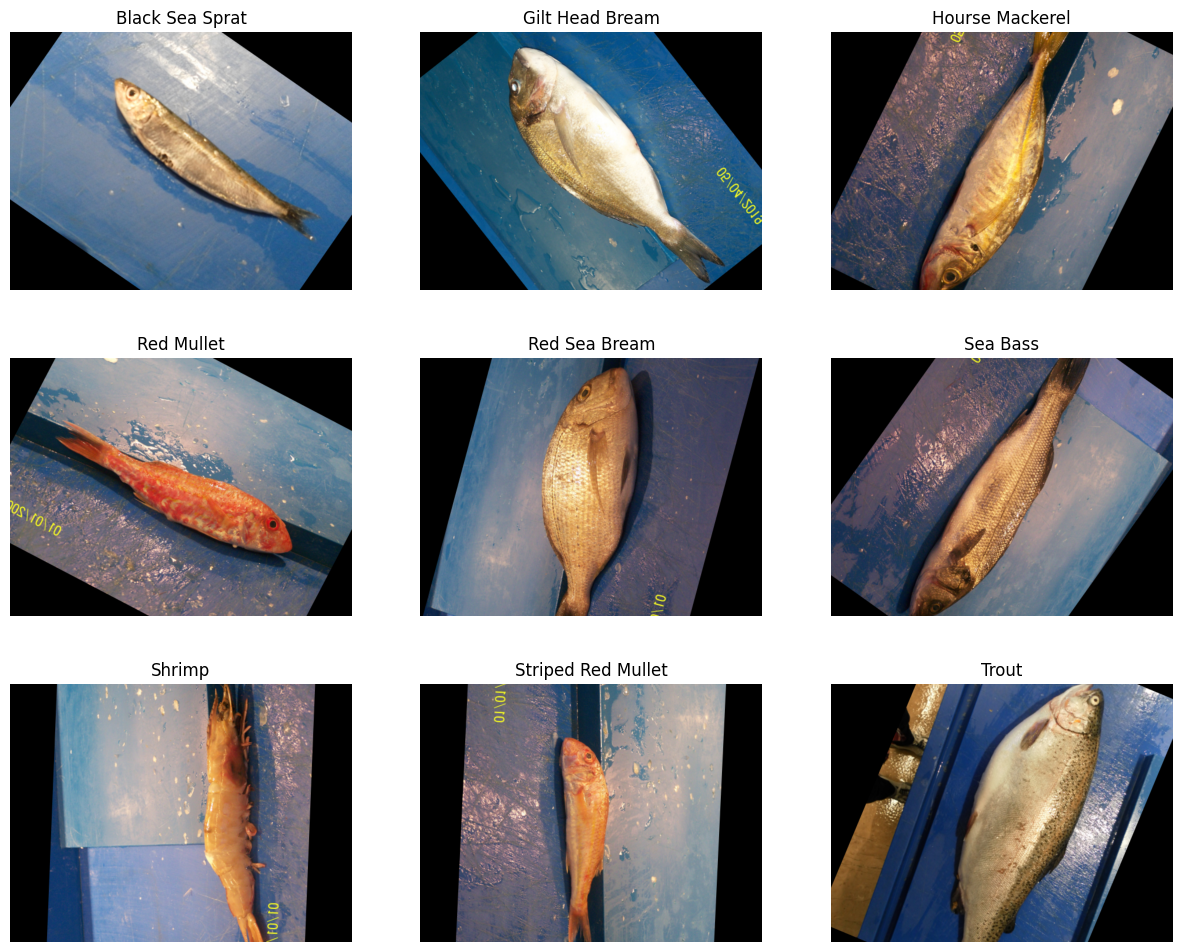

In [7]:
# xem ảnh RGB của 9 ảnh của các loại cá
idx = 0
plt.figure(figsize=(15,12))
for i in y:
    plt.subplot(3, 3, idx+1)
    plt.imshow(plt.imread(df[df['label']==i].iloc[1,0]))
    plt.title(i)
    plt.axis('off')
    idx+=1

In [8]:
# chia dữ liệu thành train với val với tỷ lệ  8:2
train_df, val_df = train_test_split(df, train_size=0.8, shuffle=True, random_state=42)

- train_df là dataframe chứa thông tin về đường dẫn của các ảnh huấn luyện và nhãn tương ứng.
- x_col và y_col là tên của các cột trong train_df lưu đường dẫn ảnh và nhãn tương ứng.
- color_mode được chọn là grayscale để đọc ảnh đầu vào ở dạng màu xám.
-  class_mode được chọn là categorical để huấn luyện mô hình phân loại nhiều lớp.
-  batch_size là số lượng ảnh được đưa vào huấn luyện cùng lúc.

In [9]:
train_df.count() , val_df.count()

(path     7200
 label    7200
 dtype: int64,
 path     1800
 label    1800
 dtype: int64)

In [10]:
# Chuẩn hóa ảnh về trong dạng[0,1] và giảm kích thước về cỡ 250 * 250

train_generator =ImageDataGenerator(rescale=1./255)
val_generator = ImageDataGenerator(rescale=1./255)

# tạo ra 
train_images = train_generator.flow_from_dataframe(dataframe=train_df, x_col='path', y_col='label', target_size=(250,250), color_mode="rgb", class_mode='categorical', batch_size=32)
val_images = val_generator.flow_from_dataframe(dataframe=train_df, x_col='path', y_col='label', target_size=(250,250), color_mode="rgb", class_mode='categorical', batch_size=32)

Found 7200 validated image filenames belonging to 9 classes.
Found 7200 validated image filenames belonging to 9 classes.


In [11]:
# xác định label cho mỗi loại
display(train_images.class_indices)
display(val_images.class_indices)

{'Black Sea Sprat': 0,
 'Gilt Head Bream': 1,
 'Hourse Mackerel': 2,
 'Red Mullet': 3,
 'Red Sea Bream': 4,
 'Sea Bass': 5,
 'Shrimp': 6,
 'Striped Red Mullet': 7,
 'Trout': 8}

{'Black Sea Sprat': 0,
 'Gilt Head Bream': 1,
 'Hourse Mackerel': 2,
 'Red Mullet': 3,
 'Red Sea Bream': 4,
 'Sea Bass': 5,
 'Shrimp': 6,
 'Striped Red Mullet': 7,
 'Trout': 8}

c:\Users\vannt\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


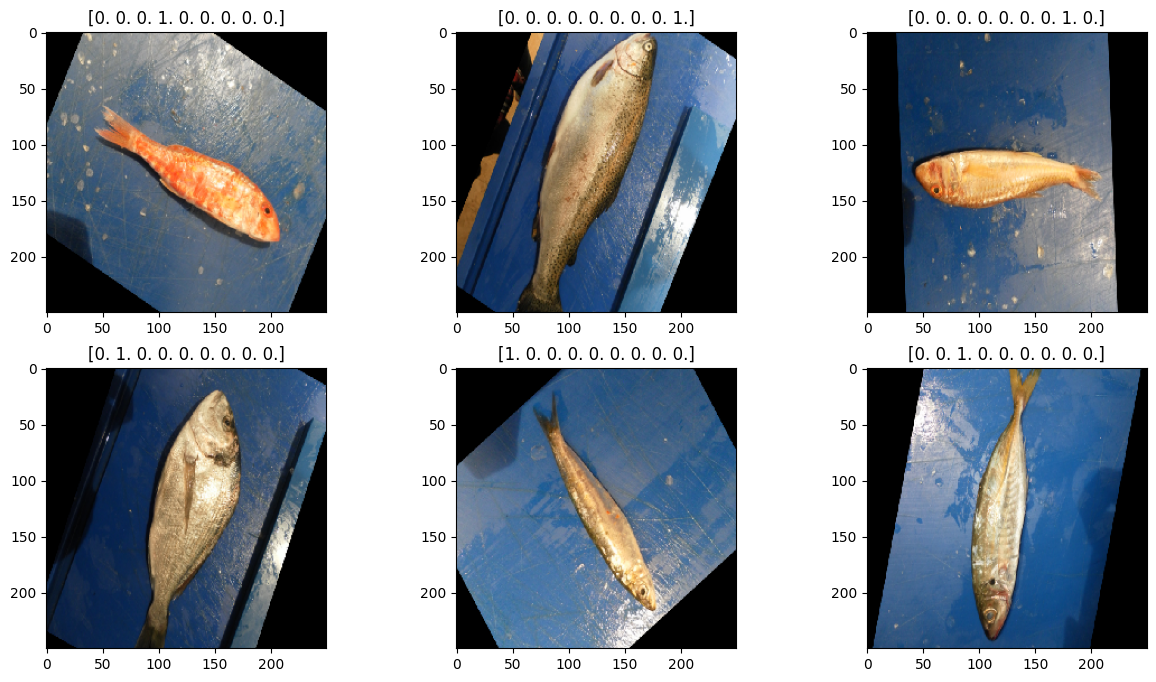

In [12]:
# hiển thị ảnh sau khi xử lý
fit, ax= plt.subplots(nrows=2, ncols=3, figsize=(15,8))
ax=ax.flatten()
j=0
for i in range(6):
    img, label = val_images.next()
    ax[j].imshow(img[0],)
    ax[j].set_title(label[0])
    j=j+1
plt.show();

# Thực hiện việc rút gọn số chiều dữ liệu, sau đó tham khảo để hiển thị trực quan các phân lớp dữ liệu dạng 3D hoặc 2D.

In [13]:
df

,path,label
0,D:\study\machine_learning\classification_fish\...,Black Sea Sprat
1,D:\study\machine_learning\classification_fish\...,Black Sea Sprat
2,D:\study\machine_learning\classification_fish\...,Black Sea Sprat
3,D:\study\machine_learning\classification_fish\...,Black Sea Sprat
4,D:\study\machine_learning\classification_fish\...,Black Sea Sprat
...,...,...
8995,D:\study\machine_learning\classification_fish\...,Trout
8996,D:\study\machine_learning\classification_fish\...,Trout
8997,D:\study\machine_learning\classification_fish\...,Trout
8998,D:\study\machine_learning\classification_fish\...,Trout


In [14]:
import cv2
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Đọc dữ liệu
X = []
for path in df['path']:
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (250, 250))
    X.append(img.flatten())
X = np.array(X)

label_dict ={'Black Sea Sprat': 0, 'Gilt Head Bream': 1, 'Hourse Mackerel': 2, 'Red Mullet': 3, 'Red Sea Bream': 4, 'Sea Bass': 5, 'Shrimp': 6, 'Striped Red Mullet': 7, 'Trout': 8}
labels = df['label'].map(label_dict)

- shrink = 0.5  là  tỷ lệ thu nhỏ của thanh màu 
- aspect = 8 là chiều rộng của colorbar sẽ bằng 1/8 chiều dài của nó.

C:\Users\vannt\AppData\Local\Temp\ipykernel_656\3357653561.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['Black Sea Sprat', 'Gilt Head Bream','Hourse Mackerel', 'Red Mullet', 'Red Sea Bream', 'Sea Bass', 'Shrimp', 'Striped Red Mullet', 'Trout'])


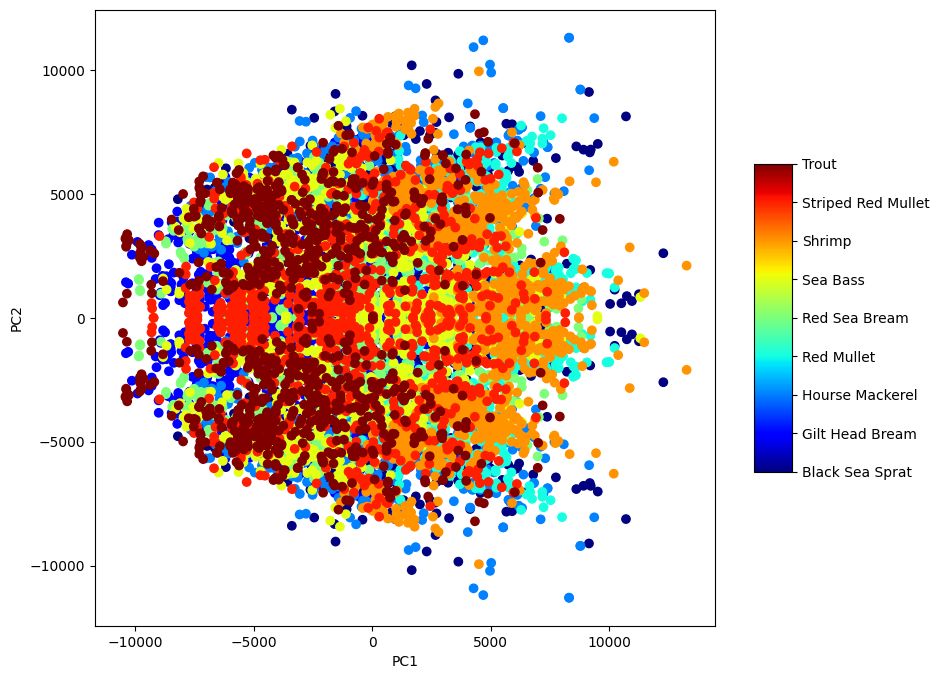

In [15]:
# giảm chiều về 2D
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X)
# Trực quan hóa dữ liệu dạng 2D

fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=labels, cmap='jet')
cbar = plt.colorbar(ax.collections[0], shrink=0.5, aspect=8)
cbar.ax.set_yticklabels(['Black Sea Sprat', 'Gilt Head Bream','Hourse Mackerel', 'Red Mullet', 'Red Sea Bream', 'Sea Bass', 'Shrimp', 'Striped Red Mullet', 'Trout'])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
plt.show()

C:\Users\vannt\AppData\Local\Temp\ipykernel_656\572092098.py:10: UserWarning:

FixedFormatter should only be used together with FixedLocator



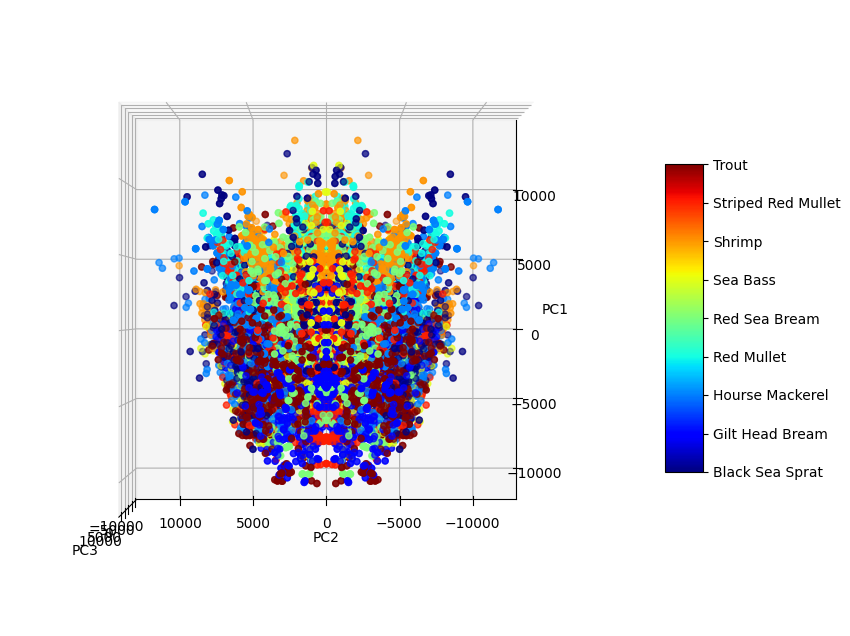

In [76]:
# Giảm số chiều về 3D
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X)

# Trực quan hóa dữ liệu dạng 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=labels, cmap='jet')
cbar = plt.colorbar(ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=labels, cmap='jet'), shrink=0.5, aspect=8)
cbar.ax.set_yticklabels(['Black Sea Sprat', 'Gilt Head Bream','Hourse Mackerel', 'Red Mullet', 'Red Sea Bream', 'Sea Bass', 'Shrimp', 'Striped Red Mullet', 'Trout'])

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# Xoay hình 3D
ax.view_init(elev=90, azim=180) # elev: độ nghiêng, azim: góc quay

plt.show()


In [ ]:
# Sử dụng để chạy trên Jupyter Notebook (Anaconda) - có thể xoay ảnh để nhìn

# import plotly.graph_objs as go
# import pandas as pd

# df = pd.DataFrame({'x': X_pca_3d[:, 0],
#                    'y': X_pca_3d[:, 1],
#                    'z': X_pca_3d[:, 2],
#                    'label': labels})

# fig = go.Figure(data=[go.Scatter3d(x=df['x'], y=df['y'], z=df['z'], mode='markers', marker=dict(size=5, color=df['label'], colorscale='jet', opacity=0.8))])
# fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
# fig.show()